In [ ]:
# Name: Aai Xun En
# Student ID: P2104089
# Class/Module Class: DISM/FT/2B/21, EL/EP0302/FT/02
# Title: Trend in Singaporeans taking out loans to buy HDBs flats for the purpose of renting to others

# Dataset URLs: 
# https://data.gov.sg/dataset/resident-households-by-type-of-dwelling-ethnic-group-of-head-of-household-and-tenancy-2015
# https://data.gov.sg/dataset/resident-households-by-type-of-dwelling-and-age-group-of-head-of-household-2015
# https://data.gov.sg/dataset/resident-households-by-type-of-dwelling-household-size-and-ethnic-group-of-head-of-household-2015
# https://data.gov.sg/dataset/renting-out-of-flats

# Naming convention: c2_ca1_[name].ipynb

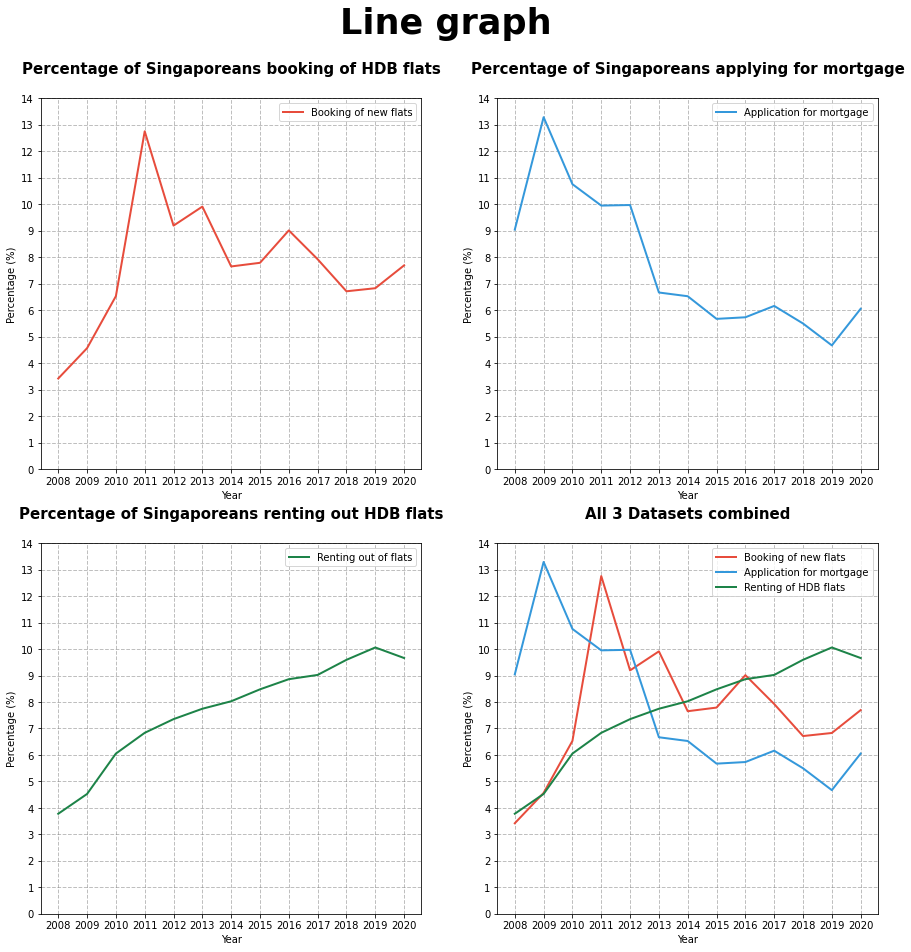

This graph shows the percentage of Singaporeans booking, applying for mortgage and renting out HDB flats
From this graph I am able to see that Singaporeans are more likely to book HDB flats for themselves rather then renting out the flats to others as compared to the other countries
Graph 4 shows the combined graph of all 3 datasets, giving us the insight that both booking of HDB flats and application of mortgage increased in 2020, but renting out HDB flats decreased. This is likely due to the Covid pandemic affecting the economic situation of Singapore


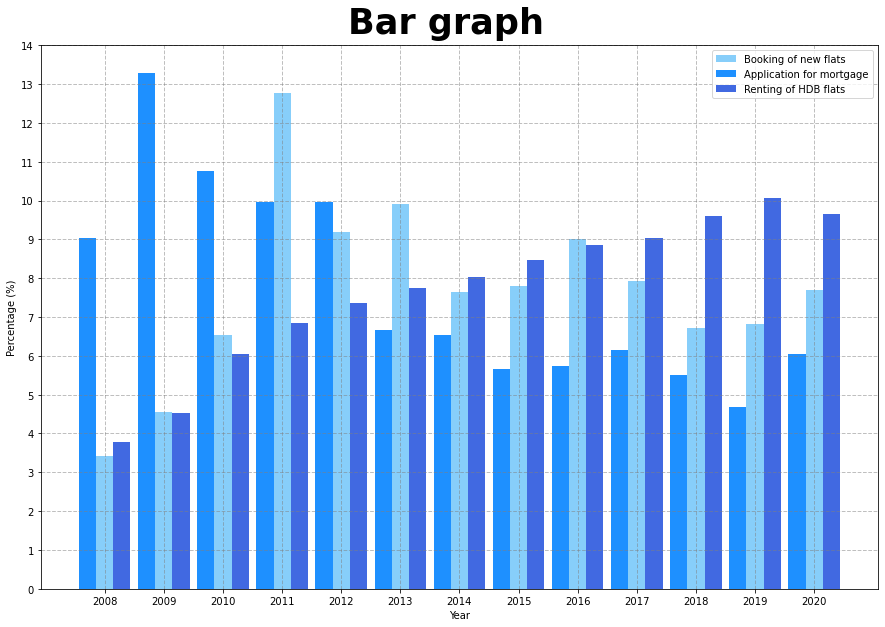

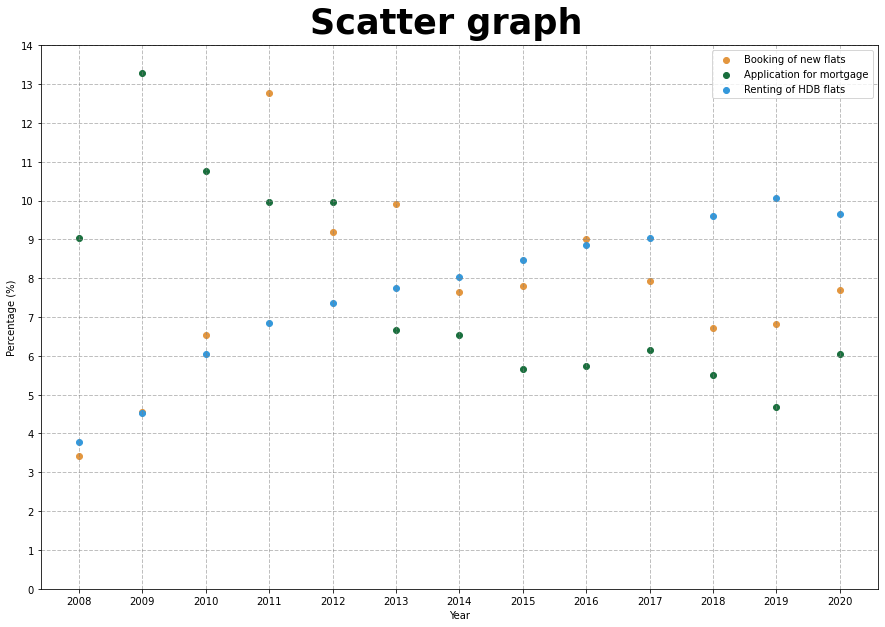

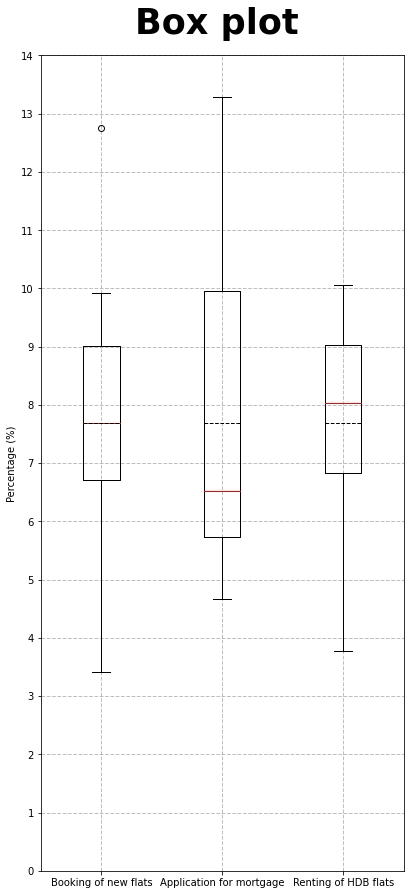

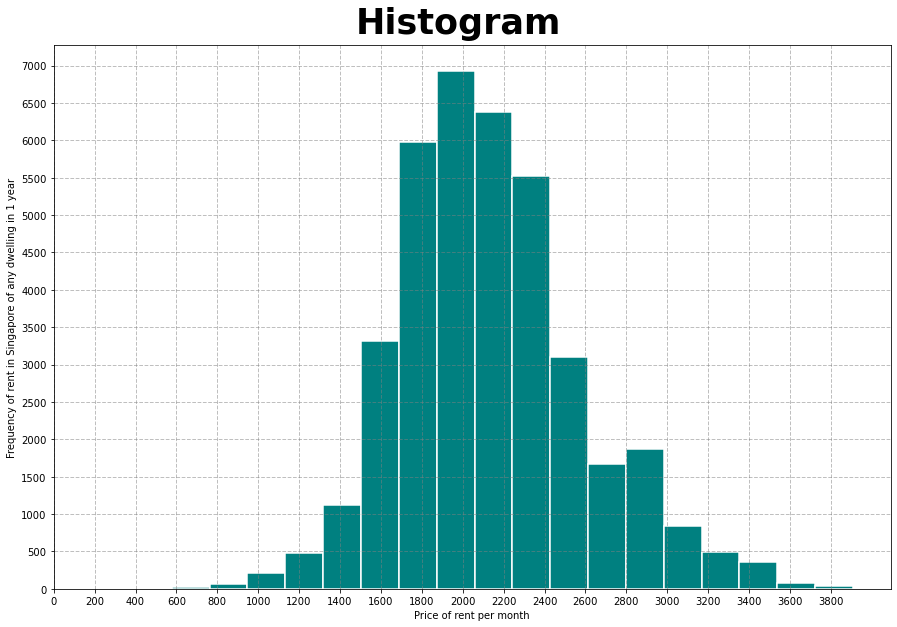

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# global variables: shades of blue
colors = ['#87cefa', '#1e90ff', '#4169e1', '#6495ed', '#F0E442', '#87ceeb', '#00bfff', '#ace5ee', '#ffa500', '#ff8c00', '#ff7f50', '#ff6347', '#ff4500', '#ffd700', '#ffa500', '#ff8c00']
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', colors)

renting_out_flats = np.genfromtxt("csvDataHDB/active-cases-of-renting-out-of-flat.csv", delimiter=",", dtype=str, skip_header=3)
renting_out_flats_list = [[],[]]

# generate from age group
application_for_loan = np.genfromtxt("csvDataHDB/applications-received-to-finance-purchases-refinance-mortgage-loan-with-bank-loans.csv", delimiter=",", dtype=str, skip_header=1)
application_for_loan_list = [[],[]]
temp_list = []

booking_of_new_flats = np.genfromtxt("csvDataHDB/bookings-for-new-flats.csv", delimiter=",", dtype=str, skip_header=1)
booking_of_new_flats_list = [[],[]]

rent_price_of_all_flats = np.genfromtxt("csvDataHDB/renting-out-of-flats.csv", delimiter=",", dtype=str, skip_header=1)
rent_price_of_all_flats_list = []

average_of_all_trend_values = [[],[]]

for i in range(len(renting_out_flats)):
    renting_out_flats_list[0].append(int(renting_out_flats[i][0]))
    renting_out_flats_list[1].append(int(renting_out_flats[i][1]))

count = 1
for i in range(len(application_for_loan)):
    if application_for_loan[i][1] == "new flat buyers" or application_for_loan[i][1] == "resale flat buyers":
        temp_list.append(int(application_for_loan[i][2]))
        application_for_loan_list[0].append(int(application_for_loan[i][0]))
        # print(application_for_loan_list)
        # add resale flat buyers and new flat buyers together
        if count % 2 == 0:
            application_for_loan_list[1].append(sum(temp_list))
            temp_list = []
        count += 1
# remove duplicate years in application_for_loan_list[0]
application_for_loan_list[0] = list(set(application_for_loan_list[0]))
application_for_loan_list[0].sort()

for i in range(len(booking_of_new_flats)):
    booking_of_new_flats_list[0].append(int(booking_of_new_flats[i][0]))
    booking_of_new_flats_list[1].append(int(booking_of_new_flats[i][1]))

for i in range(len(rent_price_of_all_flats)):
    rent_price_of_all_flats_list.append(int(rent_price_of_all_flats[i][5]))

rent_price_of_all_flats_list.sort(key=int)
indi_rent_price_of_all_flats_list = []
for i in range(len(rent_price_of_all_flats_list)):
    indi_rent_price_of_all_flats_list.append(rent_price_of_all_flats_list[i])
    # remove duplicate years in indi_rent_price_of_all_flats_list
indi_rent_price_of_all_flats_list = list(set(indi_rent_price_of_all_flats_list))
indi_rent_price_of_all_flats_list.sort(key=int)

percentage_of_renting_out_flats = [[],[]]
percentage_of_application_for_loan = [[],[]]
percentage_of_booking_of_new_flats = [[],[]]

for i in range(len(renting_out_flats_list[0])):
    percentage_of_renting_out_flats[0].append(renting_out_flats_list[0][i])
    percentage_of_renting_out_flats[1].append(renting_out_flats_list[1][i]/sum(renting_out_flats_list[1])*100)

for i in range(len(application_for_loan_list[0])):
    percentage_of_application_for_loan[0].append(application_for_loan_list[0][i])
    percentage_of_application_for_loan[1].append(application_for_loan_list[1][i]/sum(application_for_loan_list[1])*100)

for i in range(len(booking_of_new_flats_list[0])):
    percentage_of_booking_of_new_flats[0].append(booking_of_new_flats_list[0][i])
    percentage_of_booking_of_new_flats[1].append(booking_of_new_flats_list[1][i]/sum(booking_of_new_flats_list[1])*100)

# find average of all three datasets
for i in range(len(percentage_of_booking_of_new_flats[0])):
    average_of_all_trend_values[0].append(int(percentage_of_booking_of_new_flats[0][i]))
    average_of_all_trend_values[1].append((float(percentage_of_booking_of_new_flats[1][i]) + float(percentage_of_application_for_loan[1][i]) + float(percentage_of_renting_out_flats[1][i])) / 3)

# print(rent_price_of_all_flats)
# remove duplicate years in rent_price_of_all_flats_list
# print(rent_price_of_all_flats_list)
# print(average_of_all_trend_values)
# print(renting_out_flats_list)
# print(application_for_loan_list)
# print(booking_of_new_flats_list)
# print(percentage_of_renting_out_flats)
# print(percentage_of_application_for_loan)
# print(percentage_of_booking_of_new_flats)

plt.figure(figsize=(15, 15))
plt.suptitle("Line graph", fontsize=35, fontweight="bold", y=0.965)
plt.subplot(2, 2, 1)
plt.plot(percentage_of_booking_of_new_flats[0], percentage_of_booking_of_new_flats[1], label="Booking of new flats", linewidth=2, color="#E74C3C")
plt.yticks(np.arange(0, 15, 1))
plt.xticks(np.arange(percentage_of_booking_of_new_flats[0][0], percentage_of_booking_of_new_flats[0][-1]+1, 1))
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Singaporeans booking of HDB flats", fontsize=15, fontweight="bold", y=1.05)
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)

plt.subplot(2, 2, 2)
plt.plot(percentage_of_application_for_loan[0], percentage_of_application_for_loan[1], label="Application for mortgage", linewidth=2, color="#3498DB")
plt.yticks(np.arange(0, 15, 1))
plt.xticks(np.arange(percentage_of_application_for_loan[0][0], percentage_of_application_for_loan[0][-1]+1, 1))
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Singaporeans applying for mortgage", fontsize=15, fontweight="bold", y=1.05)
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)

plt.subplot(2, 2, 3)
plt.plot(percentage_of_renting_out_flats[0], percentage_of_renting_out_flats[1], label="Renting out of flats", linewidth=2, color="#1D8348")
plt.yticks(np.arange(0, 15, 1))
plt.xticks(np.arange(percentage_of_renting_out_flats[0][0], percentage_of_renting_out_flats[0][-1]+1, 1))
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Singaporeans renting out HDB flats", fontsize=15, fontweight="bold", y=1.05)
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)

plt.subplot(2, 2, 4)
plt.plot(percentage_of_booking_of_new_flats[0], percentage_of_booking_of_new_flats[1], label="Booking of new flats", linewidth=2, color="#E74C3C")
plt.plot(percentage_of_application_for_loan[0], percentage_of_application_for_loan[1], label="Application for mortgage", linewidth=2, color="#3498DB")
plt.plot(percentage_of_renting_out_flats[0], percentage_of_renting_out_flats[1], label="Renting of HDB flats", linewidth=2, color="#1D8348")
plt.yticks(np.arange(0, 15, 1))
plt.xticks(np.arange(percentage_of_renting_out_flats[0][0], percentage_of_renting_out_flats[0][-1]+1, 1))
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("All 3 Datasets combined", fontsize=15, fontweight="bold", y=1.05)
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)
plt.show()
print("This graph shows the percentage of Singaporeans booking, applying for mortgage and renting out HDB flats")
print("From this graph I am able to see that Singaporeans are more likely to book HDB flats for themselves rather then renting out the flats to others as compared to the other countries")
print("Graph 4 shows the combined graph of all 3 datasets, giving us the insight that both booking of HDB flats and application of mortgage increased in 2020, but renting out HDB flats decreased. This is likely due to the Covid pandemic affecting the economic situation of Singapore")

plt.figure(figsize=(15, 10))
plt.suptitle("Bar graph", fontsize=35, fontweight="bold", y=0.934)
ind = np.arange(13)
width = 0.29
plt.bar(ind + width, percentage_of_booking_of_new_flats[1], width, label="Booking of new flats")
plt.bar(ind, percentage_of_application_for_loan[1], width, label="Application for mortgage")
plt.bar(ind + width + width, percentage_of_renting_out_flats[1], width, label="Renting of HDB flats")
# plot the best fit line with np.polyfit
# z = np.polyfit(ind, average_of_all_trend_values[1], 1)
# p = np.poly1d(z)
# plt.plot(ind, p(ind), "r--")
plt.yticks(np.arange(0, 15, 1))
plt.xticks(ind + width, percentage_of_renting_out_flats[0])
plt.ylabel("Percentage (%)")
plt.xlabel("Year")
plt.legend(loc="upper right")
# plot a best fit graph of the data
plt.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)
plt.show()

plt.figure(figsize=(15, 10))
plt.suptitle("Scatter graph", fontsize=35, fontweight="bold", y=0.934)
plt.scatter(percentage_of_booking_of_new_flats[0], percentage_of_booking_of_new_flats[1], label="Booking of new flats", color="#E3963E")
plt.scatter(percentage_of_application_for_loan[0], percentage_of_application_for_loan[1], label="Application for mortgage", color="#196F3D")
plt.scatter(percentage_of_renting_out_flats[0], percentage_of_renting_out_flats[1], label="Renting of HDB flats", color="#3498DB")
plt.yticks(np.arange(0, 15, 1))
plt.xticks(np.arange(percentage_of_renting_out_flats[0][0], percentage_of_renting_out_flats[0][-1]+1, 1))
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)
plt.show()

plt.figure(figsize=(6.5, 15))
plt.suptitle("Box plot", fontsize=35, fontweight="bold", y=0.925)
plt.boxplot([percentage_of_booking_of_new_flats[1], percentage_of_application_for_loan[1], percentage_of_renting_out_flats[1]], labels=["Primary", "O-Level", "N-Level"], showmeans=True, meanline=True, meanprops={"color": "black"}, medianprops={"color": "red"})
plt.xticks([1, 2, 3], ["Booking of new flats", "Application for mortgage", "Renting of HDB flats"])
plt.yticks(np.arange(0, 15, 1))
plt.ylabel("Percentage (%)")
# show grid
plt.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)
plt.show()

plt.figure(figsize=(15, 10))
# plot a histogram of booking_of_new_flats[1]
plt.hist(rent_price_of_all_flats_list, bins=20, label="Booking of new flats", align='left', color='#008080', edgecolor='white', linewidth=1.5)
plt.xlabel("Price of rent per month")
plt.ylabel("Frequency of rent in Singapore of any dwelling in 1 year")
plt.suptitle("Histogram", fontsize=35, fontweight="bold", y=0.934)
# makes a grid 
plt.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)
# yticks
plt.yticks(np.arange(0, 7500, 500))
plt.xticks(np.arange(0, 4000, 200))
plt.show()